# Bayes Theorem

Bayes Theorem uses prior knowledge or experience to provide better results. 
Mathematically speaking, it uses conditional probability of an event 

Bayes’ theorem is stated mathematically as the following equation:

P(A/B) = P(B/A)P(A)/P(B)

where
--A and B are events and P(B) not equal to 0.
--P(A) and P(B) are the probabilities of observing A and B independently of each other.
--P(A/B) is the conditional probability i.e. the probability of occurance of A given that B is true (has already occurred).
--P(B/A) is the conditional probability of B given that A is true.

# Bayesian Inference

Bayesian Inference is a method of Statistical Inference where we update the probability of our hypothesis(prior) H, as more information(data) D becomes available and finally arrive at our posterior probability.
Bayes Theorem lays down the foundation of Bayesian Inference. Mathematically Expressing, we have

P(H/D) = P(H)P(D/H)/P(D)

where
-- P(H) is the probability of the hypothesis before we see the data, prior.
-- P(H/D) is what we want to compute, the probability of the hypothesis
after we see the data, posterior.
-- P(D/H) is the probability of the data under the hypothesis.
-- P(D) is the probability of the data under any hypothesis.

In [5]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Coin_Toss Example
# Taking Prior to be Uniform(0,1) i.e. Beta(1,1) Distribution 
theta_real = 0.35  
trials = [0, 1, 2, 3, 5, 10, 25, 50, 150, 500]
data = [0, 1, 1, 1, 1, 4, 10, 13, 48, 179] #Randomly generated for given no. of trials
dist = stats.beta
x = np.linspace(0, 1, 100)
c = 'b' #blue color
a_prior = 1   #Beta_Distribution_Parameters 
b_prior = 1

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
        
    y = data[idx]
    p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
    plt.plot(x, p_theta_given_y, c)
    plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
        
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N,y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,20)
    plt.xlabel(r'$\theta$')
    plt.legend(loc = 'upper right', fontsize = 'x-small')
    plt.gca().axes.get_yaxis().set_visible(False)
        

In the above coin toss example, we have probability of heads coming up to be 0.35.
We assume our prior-the probability distribution of heads coming up to be Uniform(0,1) Distribution. 
And then on the basis of data we arrive at our posterior distribution of heads coming up.
What we notice is that our distribution gets more accurate as we increase the number of trials.

Now, assuming prior to be Bernoulli(0.5) Distribution and combining our result weith our previous prior we have

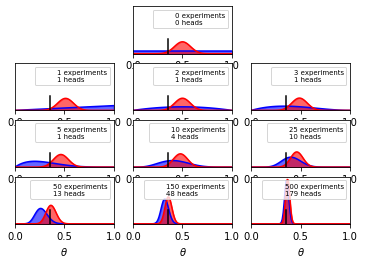

In [8]:
theta_real = 0.35
trials = [0, 1, 2, 3, 5, 10, 25, 50, 150, 500]
data = [0, 1, 1, 1, 1, 4, 10, 13, 48, 179]
beta_params = [(1, 1), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 100)

for idx, N in enumerate(trials):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    y = data[idx]
    for (a_prior, b_prior), c in zip(beta_params, ('b', 'r')):
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.plot(x, p_theta_given_y, c)
        plt.fill_between(x, 0, p_theta_given_y, color=c, alpha=0.6)
        
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label="{:d} experiments\n{:d} heads".format(N,y), alpha=0)
    plt.xlim(0,1)
    plt.ylim(0,20)
    plt.xlabel(r'$\theta$')
    plt.legend(loc = 'upper right', fontsize = 'x-small')
    plt.gca().axes.get_yaxis().set_visible(False)

# Prior

INFLUENCE OF THE PRIOR:

The prior influences the result of our analysis.
As it is obvious from above example, the influence of the prior is more dominant when data-volume is less. The prior eventually subsidizes as the number of trials becomes larger (where using frequentist's inference methods might be a better option).  

HOW TO CHOOSE A PRIOR:

This is quite a subjective question. Some do use a non-informative priors (such as Uniform(0,1) in our first example). 
Unless and until we are quite sure, it is not recommended to use strongly informative priors in our analysis.

# Posterior

The resultant proability distribution which summarizes both prior and the data is the posterior.

HIGHEST POSTERIOR DENSITY (HPD) INTERVAL

A highly useful tool to summarize the spread of the the posterior density. 
It is defined as the shortest interval containing a given portion of probability density. 

---------------------------------------------------------------x----------------------------------------------------------

There are several ways to compute Posterior computationally which can be broadly classified as

-- Non-Markovian Methods  
-- Markovian Methods

NON-MARKOVIAN METHODS

  GRID COMPUTING:
    It is a brute force approach mainly used when we cannot compute the posterior analytically. 
    For a single parameter model, the grid approach is as follows:
    -- Define a reasonable interval for the parameter (the prior should give you a hint).
    -- Place a grid of points (generally equidistant) on that interval.
    -- For each point in the grid we multiply the likelihood and the prior.
    -- Normalize the computed values (divide the result at each point by sum of all points).
    
   The Grid Computing approach does not scale well for high-dimension data. 

In [7]:
# Example of Grid Approach -- Coin_Toss Example

def posterior_grid(grid_points, heads, tosses):

    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(5, grid_points)
    likelihood = stats.binom.pmf(heads, tosses, grid)
    pos = likelihood * prior #Posterior
    n_pos = pos / pos.sum() #Normalzed Posterior
    return grid, n_pos

Text(0.5, 1.0, 'The posterior density')

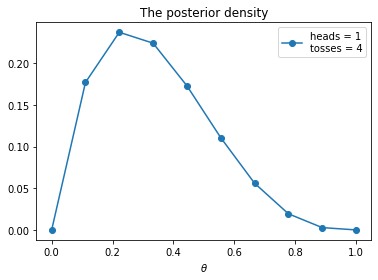

In [10]:
h = 1
n = 4
grid, posterior = posterior_grid(10, h, n)
plt.plot(grid, posterior, 'o-', label='heads = {}\ntosses = {}'.format(h, n))
plt.xlabel(r'$\theta$')
plt.legend()
plt.title('The posterior density')

There are other Non-markovian methods as well such as QUADRATIC(LAPLACE) METHOD and VARIATIONAL METHODS.

MARKOVIAN METHODS: 

There's a family of methods known as MCMC- MONTE CARLO MARKOV CHAIN Methods. 
Here as well, we need to compute the prior and the likelihood at each point to approimate the whole posterior distribution.
MCMC methods outperform the grid approximation because they are designed to
spend more time in higher probability regions than in lower ones.

In [1]:
# Revisiting the coin toss Example

Using PyMC3 Library (Python Library for probabilistic Programming) 

In [3]:
# pip install pymc3

In [6]:
import pymc3 as pm

In [8]:
# pip install pymc3
import pymc3 as pm

np.random.seed(123)
n_experiments = 4
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=n_experiments)
print(data)

[1 0 0 0]


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]
Sampling 2 chains, 0 divergences: 100%|█| 3000/3000 [00:15<00:00, 193.98draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000001AEF4BACC0>,
      dtype=object)

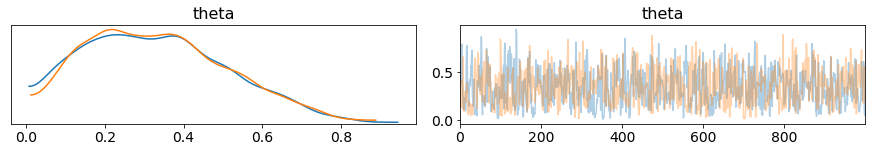

In [9]:
with pm.Model() as our_first_model:
    theta = pm.Beta('theta', alpha=1, beta=1)       #Prior
    y = pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(1000)                         

lines = (('theta',{'theta':theta_real},[theta_real]),)   #Please do see on this once..I am not able to get the write code for plotting lines
pm.traceplot(trace, lines = lines)

In [10]:
pm.summary(trace) # Descriptive Stats of Posterior Distribution

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.337,0.18,0.043,0.672,0.006,0.004,828.0,828.0,771.0,804.0,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000001AEF670908>],
      dtype=object)

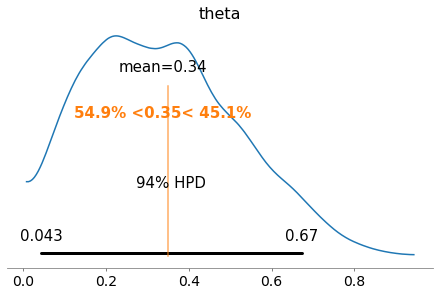

In [11]:
pm.plot_posterior(trace, ref_val=0.35)   # Posterior Distribution Plot; Ref_value is theta_real                             